# Solving 2nd Order ODEs - Machine Problem 6
In your final machine problem for the semester, you are going to solve a 2nd order ODE. Choose one of the problems to solve from the document "P131 MP 06 Problems.docx."<br><br>
In the cell below, write down all necessary modules you need to run your codes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Bouncing Ball (15 pts.)
Write down below, as Markdown, the equation of motion for a falling object.

$\frac{d^2 y}{dt^2} = -g$

Break down this second order ODE into two first order ODEs. Show your complete solution as Markdown.

Let $v=\frac{dy}{dt}$. The second order ODE then becomes $\frac{dv}{dt} =-g$. These constitute our two first order ODEs.

In order to determine the height, $y$, and the velocity, $v$, you need to solve for the solutions to these two 1st Order ODEs simultaneously. Solve for the height and velocity of a bouncing ball as a function of time, with a coefficient of restitution of 0.95. Choose the range of time such that its trajectory shows ten bounces.<br>
Define the step size and length of time. You may change the end value later in order to display ten bounces.

In [2]:
h = 0.01
t = np.arange(0,75+h,h)

Choose an appropriate initial height and velocity and type them down in the field below. Comment the units you are using.

In [3]:
y = np.zeros(np.size(t))
v = np.zeros(np.size(t))
v[0] = 10;      # initial velocity of 10 meters per second
y[0] = 100;     # initial height of 100 meters with respect to the ground

Write down the correct code below in order to simultaneously solve for the velocity and height of the ball.

In [4]:
for i in range(1,np.size(t)):
    k1v = -9.8     # this is the right hand side
    k2v = -9.8     # of the differential equation 
    k3v = -9.8     # for velocity
    k4v = -9.8     
 
    if y[i-1] <= 0:          # this code states that if the height is less than
        v[i] = -0.95*v[i-1]  # zero, then the next value of the velocity of the 
                             # ball should have a reduced magnitude reduced by 95%
                             # and opposite direction
    else:                            
        v[i] = v[i-1] + (1/6)*(k1v+2*k2v+2*k3v+k4v)*h      
                             # the next value is computed using RK4 method
        #print(v[i])
    
    k1y = v[i]     # this computes for displacement
    k2y = v[i]     # of the ball using the equation
    k3y = v[i]     # dy/dt = f(t,y) = v
    k4y = v[i]
    y[i] = y[i-1] + (1/6)*(k1y+2*k2y+2*k3y+k4y)*h
    #print(y[i])

Plot the height and velocity of the ball. Add appropriate titles to the plot and x- and y-axes labels.

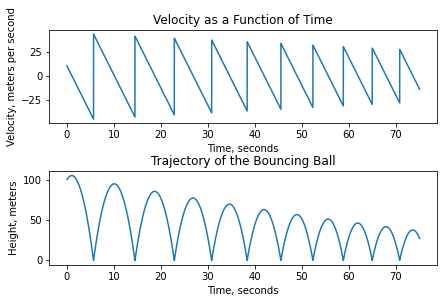

In [5]:
figure, axes = plt.subplots(nrows=2, ncols=1)
plt.subplot(2,1,1)
plt.plot(t,v)
plt.title('Velocity as a Function of Time')
plt.xlabel('Time, seconds')
plt.ylabel('Velocity, meters per second')
plt.subplot(2,1,2)
plt.plot(t,y)
plt.title('Trajectory of the Bouncing Ball')
plt.xlabel('Time, seconds')
plt.ylabel('Height, meters')
figure.tight_layout(pad=0.1)

For an additional 5 points, animate the bouncing ball based on the solution of this ODE. Display the instantaneous height and velocity as the ball is bouncing.<br><br>
$\textit{Note: When animating, it may not be necessary to display all points in order to decrease the playing time. You may increase the step size for time.}$

### Falling Parachutist (25 pts.)
Write down below, as Markdown, the equation of motion for a falling parachutist, with mass, $m=75$ $kg$, during the first 15 seconds when the dragging force is proportional to the square of the velocity. Let the dragging force, $k=0.235$ $kg/m$.

$\frac{d^2 y}{dt^2} = -[(\frac{k}{m} v^2 -g]$

Break down this second order ODE into two first order ODEs. Show your complete solution as Markdown.

Let $v = \frac{dt}{dt}$. The second order ODE above then becomes $\frac{dv}{dt} = -[(\frac{k}{m} v^2 - g)]$. These constitute our two first order ODEs.

Write down below, as Markdown, the equation of motion for a falling parachutist, with mass, $m=75$ $kg$, after the first 15 seconds when the drag coefficient is directly proportional to the velocity. Let the drag coefficient, $c=50$ $kg/s$.

$\frac{d^2 y}{dt^2} = -[(\frac{c}{m} v -g]$

Break down this second order ODE into two first order ODEs. Show your complete solution as Markdown.

Let $v = \frac{dt}{dt}$. The second order ODE above then becomes $\frac{dv}{dt} = -[(\frac{c}{m} v - g)]$. These constitute our two first order ODEs.

In order to determine the height, $y$, and the velocity, $v$, you need to solve for the solutions to these two sets of 1st Order ODEs simultaneously. Solve for the height, velocity and acceleration, of the parachutist as a function of time from $t=0$ to $t=30$ $s$.<br><br>
Define the step size and length of time.

In [6]:
h = 0.01       # step size
t = np.arange(0,30+h,h)     # time scale from 0 to 75 seconds

Choose an appropriate initial height and velocity and type them down in the field below. Comment the units you are using. 

In [7]:
y = np.zeros(np.size(t))
v = np.zeros(np.size(t))
a = np.zeros(np.size(t))
y[0] = 0      # initial height of 0 meters
v[0] = 0      # initial velocity of 0 meters per second
a[0] = 9.8    # initial acceleration of -9.8 meters per second per second

Write down the correct code below in order to simultaneously solve for the acceleration, velocity and height of the ball. 

In [8]:
def f(v):
    k = 0.235 
    m = 75
    y = -( (k/m)*v**2 - 9.8 )
    return y
    
def g(v):
    c = 50 
    m = 75
    y = -( (c/m)*v - 9.8 )
    return y
    
for i in range(1,np.size(t)):
    if t[i] <= 15:                      # this code solves for the trajectory
        k1 = f( v[i-1] )                # between the time 0 and 15 seconds
        k2 = f( v[i-1] + 0.5*k1*h )     # just before the chute is opened
        k3 = f( v[i-1] + 0.5*k2*h )
        k4 = f( v[i-1] + k3*h );
    else:
        k1 = g( v[i-1] )                # this code solves for the trajectory
        k2 = g( v[i-1] + 0.5*k1*h )     # after the time 15 seconds after the
        k3 = g( v[i-1] + 0.5*k2*h )     # chute is opened
        k4 = g( v[i-1] + k3*h )
    
    v[i] = v[i-1] + (1/6)*(k1+2*k2+2*k3+k4)*h

    k1 = v[i]
    k2 = v[i]
    k3 = v[i]
    k4 = v[i]
    y[i] = y[i-1] + (1/6)*(k1+2*k2+2*k3+k4)*h

for i in range(1,np.size(t)-1):
    a[i] = ( v[i+1] - v[i-1] )/(2*h)

Plot the height, velocity, and acceleration of the parachutist. Add appropriate titles to the plot and x- and y-axes labels.

<ipython-input-9-0768f909d817>:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  figure.tight_layout(pad=0.1)


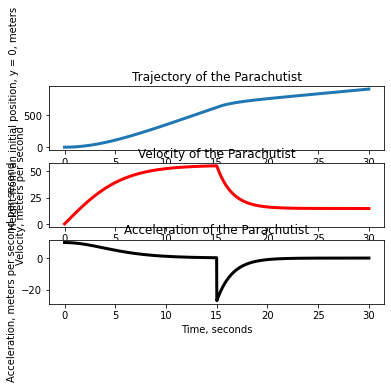

In [9]:
figure, axes = plt.subplots(nrows=3, ncols=1)
plt.subplot(3,1,1)
plt.plot(t,y, linewidth=3)
plt.title('Trajectory of the Parachutist')
plt.xlabel('Time, seconds')
plt.ylabel('Height from an initial position, y = 0, meters')
plt.subplot(3,1,2)
plt.plot(t,v,'r', linewidth=3)
plt.title('Velocity of the Parachutist')
plt.xlabel('Time, seconds')
plt.ylabel('Velocity, meters per second')
plt.subplot(3,1,3)
plt.plot(t,a,'k', linewidth=3)
plt.title('Acceleration of the Parachutist')
plt.xlabel('Time, seconds')
plt.ylabel('Acceleration, meters per second per second')
figure.tight_layout(pad=0.1)

For an additional 5 points, animate the motion of the parachutist based on the solution of this ODE. Display the instantaneous height, velocity, and acceleration as the parachutist is falling.<br><br>
$\textit{Note: When animating, it may not be necessary to display all points in order to decrease the playing time. You may increase the step size for time.}$

### The Lorentz Equations (25 pts.)
The Lorentz equations describe a simple model based on atmospheric fluid dynamics. These equations are not really second order ODEs, but first order. However, they do describe one branch of physics, which is fluid dynamics. The Lorentz equations are instructive because the depict how beautiful chaos can be.<br><br>
The Lorentz equations are given by<br>

$\frac{dx}{dt} = -\sigma x + \sigma y$, $\frac{dy}{dt} = rx-y-xz$, and $\frac{dz}{dt}=-bz+xy$.

Assume $\sigma = 10$, $b = 8/3$, and $r = 28$, with initial conditions of $x=y=z=5$. Solve for $x(t)$, $y(t)$, and $z(t)$ for $0 \le t \le 30$ with a step size of 0.01.<br><br>
Define the step size and length of time. 

In [10]:
h = 0.01       # step size
t = np.arange(0,30+h,h)     # time scale from 0 to 75 seconds

Write down the initial conditions in the field below.

In [11]:
x = np.zeros(np.size(t))
y = np.zeros(np.size(t))
z = np.zeros(np.size(t))

sigma = 10 
b = 8/3
r = 28
x[0] = 5
y[0] = 5
z[0] = 5

Write down the correct code below in order to simultaneously solve for $x(t)$, $y(t)$, and $z(t)$.

In [12]:
def fx(x,y,sigma):
    dxdt = -sigma*x + sigma*y
    return dxdt

def fy(y,x,z,r):
    dydt = r*x - y - x*z
    return dydt

def fz(z,x,y,b):
    dzdt = -b*z + x*y
    return dzdt


for i in range(1,np.size(t)):
    # this code solves for the x-component
    k1x = fx( x[i-1], y[i-1], sigma );
    k2x = fx( x[i-1] + 0.5*k1x*h, y[i-1], sigma )
    k3x = fx( x[i-1] + 0.5*k2x*h, y[i-1], sigma )
    k4x = fx( x[i-1] + k3x*h, y[i-1], sigma )
    x[i] = x[i-1] + (1/6)*(k1x+2*k2x+2*k3x+k4x)*h

    # this code solves for the y-component
    k1y = fy( y[i-1], x[i-1], z[i-1], r )
    k2y = fy( y[i-1] + 0.5*k1y*h, x[i-1], z[i-1], r )
    k3y = fy( y[i-1] + 0.5*k2y*h, x[i-1], z[i-1], r )
    k4y = fy( y[i-1] + k3y*h, x[i-1], z[i-1], r )
    y[i] = y[i-1] + (1/6)*(k1y+2*k2y+2*k3y+k4y)*h

    # this code solves for the z-component
    k1z = fz( z[i-1], x[i-1], y[i-1], b )
    k2z = fz( z[i-1] + 0.5*k1z*h, x[i-1], y[i-1], b )
    k3z = fz( z[i-1] + 0.5*k2z*h, x[i-1], y[i-1], b )
    k4z = fz( z[i-1] + k3z*h, x[i-1], y[i-1], b )
    z[i] = z[i-1] + (1/6)*(k1z+2*k2z+2*k3z+k4z)*h

Plot all three functions in one subplot.

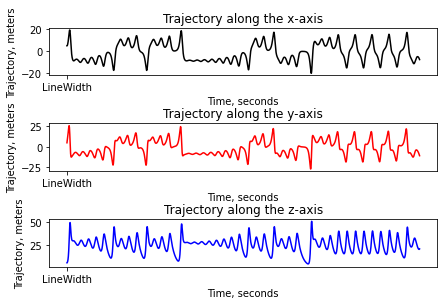

In [13]:
figure, axes = plt.subplots(nrows=3, ncols=1)
plt.subplot(3,1,1)
plt.plot(t,x,'k','LineWidth',3)
plt.title('Trajectory along the x-axis')
plt.xlabel('Time, seconds')
plt.ylabel('Trajectory, meters')
plt.subplot(3,1,2)
plt.plot(t,y,'r','LineWidth',3)
plt.title('Trajectory along the y-axis')
plt.xlabel('Time, seconds')
plt.ylabel('Trajectory, meters')
plt.subplot(3,1,3)
plt.plot(t,z,'b','LineWidth',3)
plt.title('Trajectory along the z-axis')
plt.xlabel('Time, seconds')
plt.ylabel('Trajectory, meters')
figure.tight_layout(pad=0.1)

For an additional 5 points, animate the position in 3D space and display the beauty of chaos.<br><br>
$\textit{Note: When animating, it may not be necessary to display all points in order to decrease the playing time. You may increase the step size for time.}$

### The Simple Pendulum (25 pts.)
Write down below, as Markdown, the exact equation of motion for a simple pendulum.

$\frac{d^2 \theta}{dt^2}=-\frac{g}{L} sin \theta$

Break down this second order ODE into two first order ODEs. Show your complete solution as Markdown.

Let $\omega = \frac{d \theta}{dt}$. The second order ODE above then becomes $\frac{d \omega}{dt}=-\frac{g}{L} sin \theta$. These constitute our two first order ODEs.

Write down below, as Markdown, the exact equation of motion for a simple pendulum.

$\frac{d^2 \theta}{dt^2}=-\frac{g}{L} \theta$

Break down this second order ODE into two first order ODEs. Show your complete solution as Markdown.

Let $\omega = \frac{d \theta}{dt}$. The second order ODE above then becomes $\frac{d \omega}{dt}=-\frac{g}{L} \theta$. These constitute our two first order ODEs.

In order to determine the angle, $\theta$, you need to solve for the solutions to these two sets of 1st Order ODEs. Solve for the angle, $\theta$, as a function of time from $t=0$ to $t=30$ $s$.<br><br>
Define the step size and length of time.

In [14]:
h = 0.01       # step size
t = np.arange(0,30+h,h)     # time scale from 0 to 75 seconds

Choose an appropriate initial angle and angular velocity and type them down in the field below. Comment the units you are using. Write down the correct code below in order to simultaneously solve for the angle and angular velocity of the using the exact ODE.

In [15]:
def th1(theta):
    g = 9.8
    y = -g*np.sin(theta)
    return y


# this code solves for the exact solution
theta1 = np.zeros(np.size(t))
omega1 = np.zeros(np.size(t))
theta1[0] = math.pi/4 # initial angle of pi/4 radians
omega1[0] = 0         # initial angular velocity of 0 radians per second  

for i in range(1,np.size(t)):
    k1 = th1( theta1[i-1] )               
    k2 = th1( theta1[i-1] + 0.5*k1*h )    
    k3 = th1( theta1[i-1] + 0.5*k2*h )
    k4 = th1( theta1[i-1] + k3*h )
    omega1[i] = omega1[i-1] + (1/6)*(k1+2*k2+2*k3+k4)*h

    k1 = omega1[i]
    k2 = omega1[i]
    k3 = omega1[i]
    k4 = omega1[i]
    theta1[i] = theta1[i-1] + (1/6)*(k1+2*k2+2*k3+k4)*h

Choose an appropriate initial angle and angular velocity and type them down in the field below. Comment the units you are using. Write down the correct code below in order to simultaneously solve for the angle and angular velocity of the using the approximate ODE.

In [16]:
def th2(theta):
    g = 9.8
    y = -g*theta
    return y

# this code solves for the exact solution
theta2 = np.zeros(np.size(t))
omega2 = np.zeros(np.size(t))
theta2[0] = math.pi/4 # initial angle of pi/4 radians
omega2[0] = 0         # initial angular velocity of 0 radians per second  

for i in range(1,np.size(t)):
    k1 = th2( theta2[i-1] )               
    k2 = th2( theta2[i-1] + 0.5*k1*h )    
    k3 = th2( theta2[i-1] + 0.5*k2*h )
    k4 = th2( theta2[i-1] + k3*h )
    omega2[i] = omega2[i-1] + (1/6)*(k1+2*k2+2*k3+k4)*h

    k1 = omega2[i]
    k2 = omega2[i]
    k3 = omega2[i]
    k4 = omega2[i]
    theta2[i] = theta2[i-1] + (1/6)*(k1+2*k2+2*k3+k4)*h

Compare between the approximate and exact solutions by plot the solutions for the angles in one graph and the solutions for the angular velocities in one graph as a function of time. At which maximum angle can the approximate solution be valid? Add appropriate titles to the plot and x- and y-axes labels.

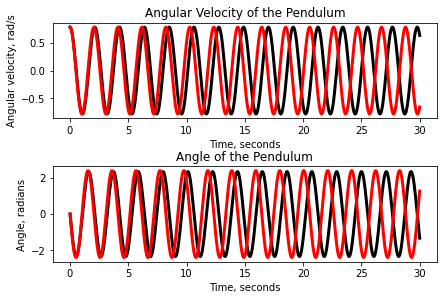

In [17]:
figure, axes = plt.subplots(nrows=2, ncols=1)
plt.subplot(2,1,1)
plt.plot(t,theta1,'k', linewidth=3)
plt.plot(t,theta2,'r', linewidth=3)
plt.title('Angular Velocity of the Pendulum')
plt.xlabel('Time, seconds')
plt.ylabel('Angular velocity, rad/s')
plt.subplot(2,1,2)
plt.plot(t,omega1,'k', linewidth=3)
plt.plot(t,omega2,'r', linewidth=3)
plt.title('Angle of the Pendulum')
plt.xlabel('Time, seconds')
plt.ylabel('Angle, radians')
figure.tight_layout(pad=0.1)

For an additional 5 points, animate a swinging pendulum based on the solution of this ODE comparing between the exact and approximate solution. Display the instantaneous angle and angular velocity.<br><br>
$\textit{Note: When animating, it may not be necessary to display all points in order to decrease the playing time. You may increase the step size for time.}$

### The Double Pendulum (35 pts.)
A double pendulum is two pendulums connected to each other at one end, as shown in the figure.<br>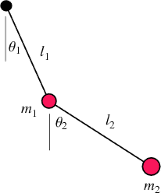<br>
The equations of motion are given by<br>

$\dot{\theta_1}=\frac{6}{ml^2}\frac{2 p_{\theta_1}-3 cos(\theta_1-\theta_2) p_{\theta_2}}{16-9 cos^2 (\theta_1-\theta_2)}$ and $\dot{\theta_2}=\frac{6}{ml^2}\frac{8 p_{\theta_2}-3 cos(\theta_1-\theta_2) p_{\theta_1}}{16-9 cos^2 (\theta_1-\theta_2)}$.

Start with the following initial conditions: $\theta_1=90 {^\circ}$, $\theta_2=90 {^\circ}$, and $\dot{p}_{\theta_1} = \dot{p}_{\theta_2} = 0{^\circ}$. To solve for the succeeding values of $p_{\theta_1}$ and $p_{\theta_2}$, you will need the following differential equations:

$\dot{p}_{\theta_1}=-\frac{1}{2} ml^2 [\dot{\theta_1} \dot{\theta_2} sin(\theta_1-\theta_2) + 3\frac{g}{l} sin \theta_1]$ and $\dot{p}_{\theta_2}=-\frac{1}{2} ml^2 [-\dot{\theta_1} \dot{\theta_2} sin(\theta_1-\theta_2) + \frac{g}{l} sin \theta_1]$

In case of doubt with the equations, refer to the ones in the document file.<br><br>
Solve the double pendulum by solving for the angular displacements, $\theta_1$ and $\theta_2$, as a function of time from $t=0$ to $t=20$ $s$.<br><br>
Define the step size and length of time.

In [18]:
h = 0.01       # step size
t = np.arange(0,20+h,h)     # time scale from 0 to 20 seconds

Choose an appropriate initial angle and angular momentum and type them down in the field below. Comment the units you are using. Write down the correct code below in order to simultaneously solve for the angle and angular velocity of the using the exact ODE.

In [19]:
def ft1( T1, T2, p1, p2 ):
    m = 1
    l = 1
    g = 9.8
    dT1dt = (6/(m*l**2))*(2*p1 - 3*np.cos(T1 - T2)*p2)/(16 - 9*(np.cos(T1 - T2))**2)
    return dT1dt

def ft2( T1, T2, p1, p2 ):
    m = 1
    l = 1
    g = 9.8
    dT2dt = (6/(m*l**2))*(8*p2 - 3*np.cos(T1 - T2)*p1)/(16 - 9*(np.cos(T1 - T2))**2)
    return dT2dt

def fp1( T1, T2, dT1, dT2 ):
    m = 1
    l = 1
    g = 9.8
    dp1dt = -(0.5*m*l**2)*(dT1*dT2*np.sin(T1 - T2) + (3*g/l)*np.sin(T1))
    return dp1dt

def fp2( T1, T2, dT1, dT2 ):
    m = 1
    l = 1
    g = 9.8
    dp2dt = -(0.5*m*l**2)*(-dT1*dT2*np.sin(T1 - T2) + (g/l)*np.sin(T2))
    return dp2dt


T1 = np.zeros(np.size(t))
T2 = np.zeros(np.size(t))
p1 = np.zeros(np.size(t))
p2 = np.zeros(np.size(t))
dT1 = np.zeros(np.size(t))
dT2 = np.zeros(np.size(t))

# initial conditions
T1[0] = 90*(math.pi/180)
T2[0] = 90*(math.pi/180)
p1[0] = 0
p2[0] = 0

for i in range(1,np.size(t)):
    # this code solves for theta one
    k1t1 = ft1( T1[i-1], T2[i-1], p1[i-1], p2[i-1] )
    k2t1 = ft1( T1[i-1] + 0.5*k1t1*h, T2[i-1], p1[i-1], p2[i-1] )
    k3t1 = ft1( T1[i-1] + 0.5*k2t1*h, T2[i-1], p1[i-1], p2[i-1] )
    k4t1 = ft1( T1[i-1] + k3t1*h, T2[i-1], p1[i-1], p2[i-1] )
    dT1[i] = (1/6)*(k1t1 + 2*k2t1 + 2*k3t1 + k4t1)
    T1[i] = T1[i-1] + dT1[i]*h
    # note that dT1 is nothing but dT1/dt or theta one dot
    
    # this code solves for theta two
    k1t2 = ft2( T1[i-1], T2[i-1], p1[i-1], p2[i-1] )
    k2t2 = ft2( T1[i-1], T2[i-1] + 0.5*k1t2*h, p1[i-1], p2[i-1] ) 
    k3t2 = ft2( T1[i-1], T2[i-1] + 0.5*k2t2*h, p1[i-1], p2[i-1] )
    k4t2 = ft2( T1[i-1], T2[i-1] + k3t2*h, p1[i-1], p2[i-1] )
    dT2[i] = (1/6)*(k1t2 + 2*k2t2 + 2*k3t2 + k4t2)
    T2[i] = T2[i-1] + dT2[i]*h
    # note that dT2 is nothing but dT2/dt or theta two dot
    
    # this code solves for p theta one
    # note the input variables dT1 and dT2, which are
    # theta one dot and theta two dot, respectively
    # one does not even need to compute for the derivative at all!
    k1p1 = fp1( T1[i-1], T2[i-1], dT1[i], dT2[i] )
    k2p1 = fp1( T1[i-1], T2[i-1], dT1[i], dT2[i] )
    k3p1 = fp1( T1[i-1], T2[i-1], dT1[i], dT2[i] )
    k4p1 = fp1( T1[i-1], T2[i-1], dT1[i], dT2[i] )
    p1[i] = p1[i-1] +  (1/6)*(k1p1 + 2*k2p1 + 2*k3p1 + k4p1)*h
    
    # this code solves for p theta two
    k1p2 = fp2( T1[i-1], T2[i-1], dT1[i], dT2[i] )
    k2p2 = fp2( T1[i-1], T2[i-1], dT1[i], dT2[i] )
    k3p2 = fp2( T1[i-1], T2[i-1], dT1[i], dT2[i] )
    k4p2 = fp2( T1[i-1], T2[i-1], dT1[i], dT2[i] )
    p2[i] = p2[i-1] +  (1/6)*(k1p2 + 2*k2p2 + 2*k3p2 + k4p2)*h

Make six subplots. You may decide how to arrange it. You must ensure that the graphs and results are clearly depicted. In the first and second subplots, plot the trajectory of the double pendulum vs time. In the third and fourth subplots, plot the momentum of the double pendulum vs time. In the fifth subplot, compare between the two phase plots of each pendulum, by plotting both $\theta_1$ vs $p_{\theta_1}$ and $\theta_2$ vs $p_{\theta_2}$ in one graph. In the sixth subplot, plot the trajectory of the double pendulum by plotting $\theta_1$ vs $\theta_2$ in one graph. Add appropriate titles to the plot and x- and y-axes labels.

<ipython-input-29-0ecdab9e4d5c>:34: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  figure.tight_layout(pad=0.1)


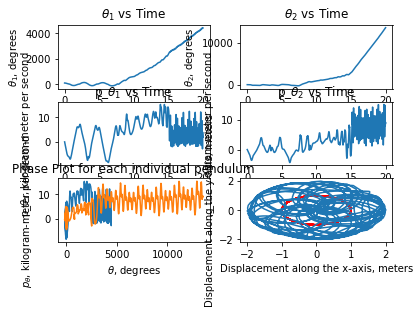

In [29]:
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.subplot(3,2,1)
plt.plot(t,T1*180/math.pi)
plt.title(r'${\theta_1}$ vs Time')
plt.xlabel('Time, seconds')
plt.ylabel(r'${\theta_1}$, degrees')
plt.subplot(3,2,2)
plt.plot(t,T2*180/math.pi)
plt.title(r'${\theta_2}$ vs Time')
plt.xlabel('Time, seconds')
plt.ylabel(r'${\theta_2}$, degrees')
plt.subplot(3,2,3)
plt.plot(t,p1)
plt.title(r'p_${\theta_1}$ vs Time')
plt.xlabel('Time, seconds')
plt.ylabel(r'p_${\theta_1}$, kilogram-meter per second')

plt.subplot(3,2,4)
plt.plot(t,p2)
plt.title(r'p_${\theta_2}$ vs Time')
plt.xlabel('Time, seconds')
plt.ylabel(r'p_${\theta_2}$, kilogram-meter per second')
plt.subplot(3,2,5)
plt.plot(T1*180/math.pi,p1)
plt.plot(T2*180/math.pi,p2)
plt.title('Phase Plot for each individual pendulum')
plt.xlabel(r'${\theta}$, degrees')
plt.ylabel(r'${p_\theta}$, kilogram-meter per second')
plt.subplot(3,2,6)
plt.plot(np.cos(T1-math.pi/2),np.sin(T1-math.pi/2),'r')
plt.plot(np.cos(T1-math.pi/2)+np.cos(T2-math.pi/2),np.sin(T1-math.pi/2)+np.sin(T2-math.pi/2))
plt.xlabel('Displacement along the x-axis, meters')
plt.ylabel('Displacement along the y-axis, meters')
figure.tight_layout(pad=0.1)

For an additional 5 points, animate a swinging pendulum based on the solution of this ODE comparing between the exact and approximate solution. Display the instantaneous angle and angular velocity.<br><br>
$\textit{Note: When animating, it may not be necessary to display all points in order to decrease the playing time. You may increase the step size for time.}$